In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import os
import shutil
import random
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input,Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
import seaborn as sns  # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore



In [2]:
# Make a folder name data
os.makedirs('data_copy', exist_ok=True)

In [3]:
# Make a folder name test and train in data_copy folder
os.makedirs('data_copy/test', exist_ok=True)
os.makedirs('data_copy/train', exist_ok=True)


In [4]:
# Make a folder name DROWSY And NATURAL in test and train folder
os.makedirs('data_copy/test/DROWSY', exist_ok=True)
os.makedirs('data_copy/test/NATURAL', exist_ok=True)
os.makedirs('data_copy/train/DROWSY', exist_ok=True)
os.makedirs('data_copy/train/NATURAL', exist_ok=True)


# Split test (20%) , Test(80%)

In [5]:
# Drowsy
files = os.listdir('Drowsy_2G_3000')
random.shuffle(files)

test_files = files[:int(len(files)*0.2)]
train_files = files[int(len(files)*0.2):]

for file in test_files:
    shutil.copy(f'Drowsy_2G_3000/{file}', f'data_copy/test/DROWSY/{file}')
for file in train_files:
    shutil.copy(f'Drowsy_2G_3000/{file}', f'data_copy/train/DROWSY/{file}')

# NonDrowsy
files = os.listdir('NonDrowsy_2G_3000')
random.shuffle(files)

test_files = files[:int(len(files)*0.2)]
train_files = files[int(len(files)*0.2):]

for file in test_files:
    shutil.copy(f'NonDrowsy_2G_3000/{file}', f'data_copy/test/NATURAL/{file}')
for file in train_files:
    shutil.copy(f'NonDrowsy_2G_3000/{file}', f'data_copy/train/NATURAL/{file}')

In [6]:
# Rename the images in the folder data_copy to im_0001, im_0002, im_0003, etc
for i, j in enumerate(os.listdir('data_copy/test/DROWSY')):
    os.rename(f'data_copy/test/DROWSY/{j}', f'data_copy/test/DROWSY/im_{i:04}.png')
for i, j in enumerate(os.listdir('data_copy/test/NATURAL')):
    os.rename(f'data_copy/test/NATURAL/{j}', f'data_copy/test/NATURAL/im_{i:04}.png')
for i, j in enumerate(os.listdir('data_copy/train/DROWSY')):
    os.rename(f'data_copy/train/DROWSY/{j}', f'data_copy/train/DROWSY/im_{i:04}.png')
for i, j in enumerate(os.listdir('data_copy/train/NATURAL')):
    os.rename(f'data_copy/train/NATURAL/{j}', f'data_copy/train/NATURAL/im_{i:04}.png')
    

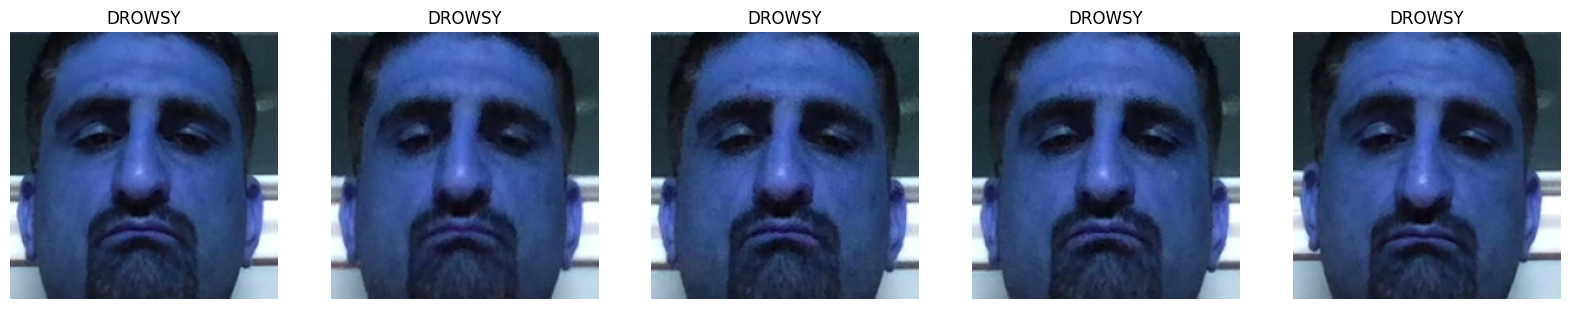

In [7]:
# Load the 5 images use 5 columns 1 row
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, j in enumerate(os.listdir('data_copy/test/DROWSY')[:5]):
    ax[i].imshow(cv2.imread(f'data_copy/test/DROWSY/{j}'))
    ax[i].axis('off')
    ax[i].set_title('DROWSY')
plt.show()


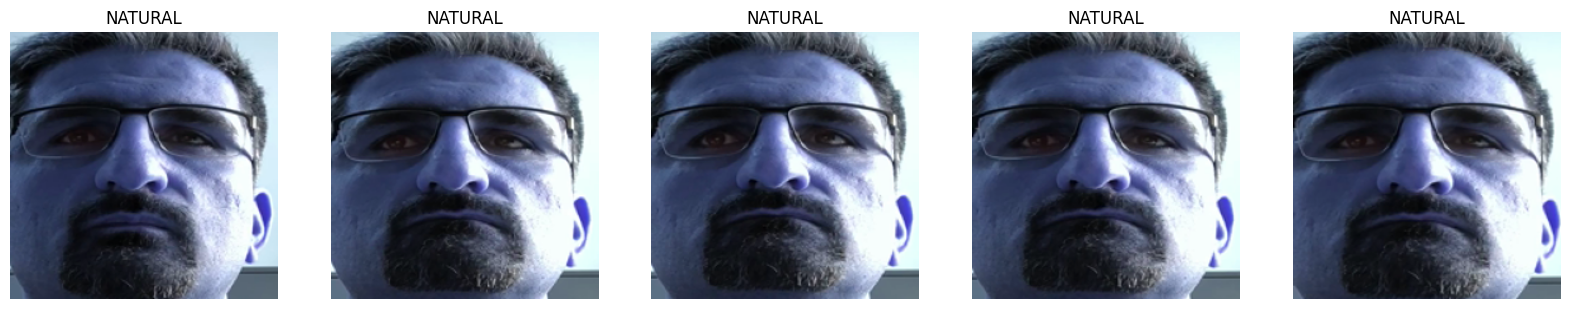

In [8]:
# Load the Natural images use 5 columns 1 row
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, j in enumerate(os.listdir('data_copy/test/NATURAL')[:5]):
    ax[i].imshow(cv2.imread(f'data_copy/test/NATURAL/{j}'))
    ax[i].axis('off')
    ax[i].set_title('NATURAL')
plt.show()


In [9]:
# Show image size
img = cv2.imread('data_copy/test/DROWSY/im_0000.png')
img.shape

(227, 227, 3)

In [10]:
# Resize all image to 48x48
for i in os.listdir('data_copy/test/DROWSY'):
    img = cv2.imread(f'data_copy/test/DROWSY/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/test/DROWSY/{i}', img)
for i in os.listdir('data_copy/test/NATURAL'):
    img = cv2.imread(f'data_copy/test/NATURAL/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/test/NATURAL/{i}', img)
for i in os.listdir('data_copy/train/DROWSY'):
    img = cv2.imread(f'data_copy/train/DROWSY/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/train/DROWSY/{i}', img)
for i in os.listdir('data_copy/train/NATURAL'):
    img = cv2.imread(f'data_copy/train/NATURAL/{i}')
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(f'data_copy/train/NATURAL/{i}', img)



Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 428ms/step - accuracy: 0.5339 - loss: 0.6901 - val_accuracy: 0.7125 - val_loss: 0.6413
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6760 - loss: 0.5634 - val_accuracy: 0.8758 - val_loss: 0.2859
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9110 - loss: 0.2260 - val_accuracy: 0.9425 - val_loss: 0.1556
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9750 - loss: 0.0689 - val_accuracy: 0.9542 - val_loss: 0.1150
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9759 - loss: 0.0646 - val_accuracy: 0.9950 - val_loss: 0.0163
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9916 - loss: 0.0218 - val_accuracy: 0.9833 - val_loss: 0.0448
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9825 - val_loss: 0.0549
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9913 - loss: 0.0414 - val_ac

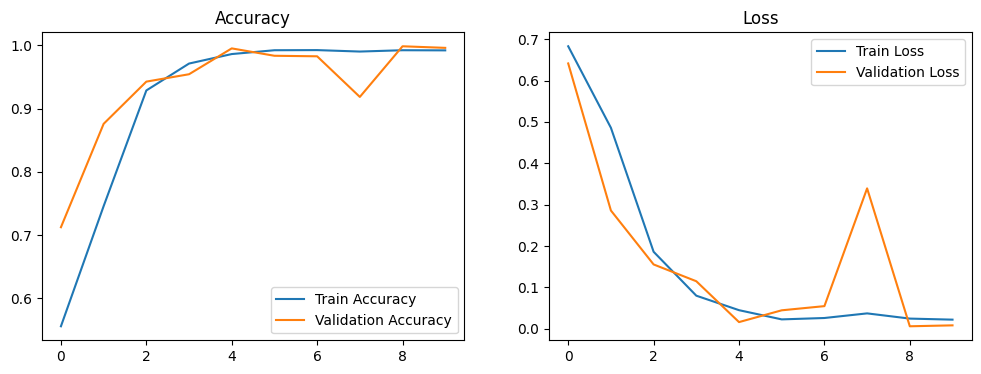

In [11]:


# Paths
train_dir = 'data_copy/train'
test_dir = 'data_copy/test'

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, zoom_range=0.2, rotation_range=20)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(48, 48), 
    batch_size=32, 
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(48, 48), 
    batch_size=32, 
    class_mode='binary'
)

# Model Definition
# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot Training History


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
# Save best performing model
model.save('model.h5')


In [12]:
# Save best performing model
model.save('model.h5')


In [13]:


# Load the data_copy
X_train = []
y_train = []
for file in os.listdir('data_copy/train/DROWSY'):
    img = cv2.imread(f'data_copy/train/DROWSY/{file}')
    X_train.append(img.flatten())
    y_train.append(1)
for file in os.listdir('data_copy/train/NATURAL'):
    img = cv2.imread(f'data_copy/train/NATURAL/{file}')
    X_train.append(img.flatten())
    y_train.append(0)

X_test = []
y_test = []
for file in os.listdir('data_copy/test/DROWSY'):
    img = cv2.imread(f'data_copy/test/DROWSY/{file}')
    X_test.append(img.flatten())
    y_test.append(1)
for file in os.listdir('data_copy/test/NATURAL'):
    img = cv2.imread(f'data_copy/test/NATURAL/{file}')
    X_test.append(img.flatten())
    y_test.append(0)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [14]:

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to match the input shape of the neural network
X_train = X_train.reshape(X_train.shape[0], 48 * 48 * 3)
X_test = X_test.reshape(X_test.shape[0], 48 * 48 * 3)

# Ensure labels are reshaped to match the output layer
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Neural Network Class
class NeuralNetwork:
    def __init__(self):
        self.w1 = np.random.randn(48 * 48 * 3, 128) * 0.01  # Weight initialization
        self.b1 = np.zeros((1, 128))
        self.w2 = np.random.randn(128, 1) * 0.01  # Output layer weight
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1  # Hidden layer input
        self.a1 = self.sigmoid(self.z1)         # Hidden layer activation
        self.z2 = np.dot(self.a1, self.w2) + self.b2  # Output layer input
        self.a2 = self.sigmoid(self.z2)         # Output layer activation
        return self.a2

    def backward(self, x, y, output, lr):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)  # Derivative of output layer
        error_hidden = d_output.dot(self.w2.T)             # Backprop error to hidden layer
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)  # Derivative of hidden layer

        # Update weights and biases
        self.w1 += x.T.dot(d_hidden) * lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr
        self.w2 += self.a1.T.dot(d_output) * lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * lr

    def train(self, X, y, epochs, lr, batch_size):
        num_samples = X.shape[0]
        for epoch in range(epochs):
            # Shuffle the data at the start of each epoch
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            # Process each batch
            for i in range(0, num_samples, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]

                # Forward and backward pass
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output, lr)

            # Print loss for the epoch
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    def predict(self, X):
        return np.round(self.forward(X))


# Train the Neural Network
nn = NeuralNetwork()
batch_size = 64  # Set batch size
nn.train(X_train, y_train, epochs=100, lr=0.001, batch_size=batch_size)

# Predict on the test set
y_pred = nn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Epoch 1/100, Loss: 0.24827289154535323
Epoch 2/100, Loss: 0.24651127839593576
Epoch 3/100, Loss: 0.24379282345956896
Epoch 4/100, Loss: 0.23988414001613412
Epoch 5/100, Loss: 0.23465592539036456
Epoch 6/100, Loss: 0.22826765391812381
Epoch 7/100, Loss: 0.22114795446347368
Epoch 8/100, Loss: 0.21440912152986327
Epoch 9/100, Loss: 0.2083087546828651
Epoch 10/100, Loss: 0.1994157619928414
Epoch 11/100, Loss: 0.192334361093176
Epoch 12/100, Loss: 0.18563958129742966
Epoch 13/100, Loss: 0.1794852176151373
Epoch 14/100, Loss: 0.1716450405995037
Epoch 15/100, Loss: 0.16450527244948007
Epoch 16/100, Loss: 0.1571473711966124
Epoch 17/100, Loss: 0.1503696417833859
Epoch 18/100, Loss: 0.14286564711479285
Epoch 19/100, Loss: 0.13489851819712825
Epoch 20/100, Loss: 0.1277084316613422
Epoch 21/100, Loss: 0.1211710203608676
Epoch 22/100, Loss: 0.11660529549389674
Epoch 23/100, Loss: 0.1060767874094203
Epoch 24/100, Loss: 0.0996543421400508
Epoch 25/100, Loss: 0.09417736879443393
Epoch 26/100, Loss: 0

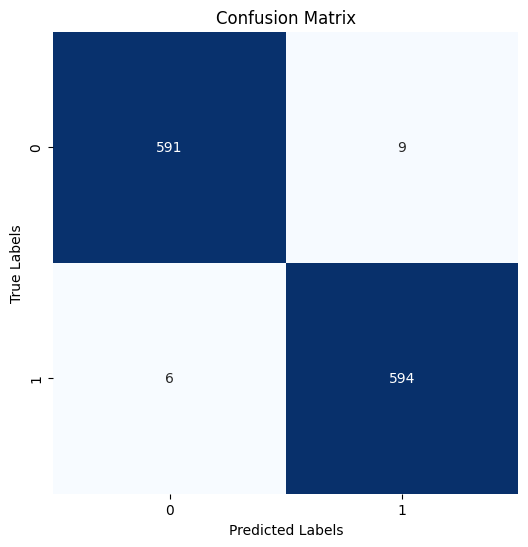

In [15]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:

# Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9908333333333333

In [17]:

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)


c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9991666666666666

In [18]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0

In [19]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9741666666666666

In [20]:

# Make a prediction function Drwosy or NonDrowsy
def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (48, 48))  # Resize the image to 48x48
    img = img / 255.0  # Normalize the image
    img = img.reshape(1, 48, 48, 3)  # Reshape to (1, 48, 48, 3)
    prediction = model.predict(img)
    if prediction >= 0.5:
        print('Drowsy')
    else:
        print('NonDrowsy')

predict_image('data_copy/test/DROWSY/im_0008.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Drowsy


In [21]:

# Make a prediction function Drowsy or NonDrowsy
def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (48, 48))  # Resize the image to 48x48
    img = img / 255.0  # Normalize the image
    img = img.flatten().reshape(1, 48 * 48 * 3)  # Flatten and reshape to (1, 48 * 48 * 3)
    nn = NeuralNetwork()  # Create an instance of NeuralNetwork
    prediction = nn.predict(img)
    if prediction >= 0.5:
        print('Drowsy')
    else:
        print('NonDrowsy')

predict_image('data_copy/test/NATURAL/im_0008.png')


Drowsy


In [22]:
model.save('model.h5')  # Save the model

# Test with Camera

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('model.h5')

# Initialize the camera
cap = cv2.VideoCapture(0)

# Load Haar cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Crop the face region
        face_region = frame[y:y + h, x:x + w]
        
        # Convert to grayscale for eye detection
        gray_face = cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY)

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(gray_face)
        
        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around eyes
            cv2.rectangle(face_region, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
            
            # Crop the eye region and preprocess it for prediction
            eye_region = face_region[ey:ey + eh, ex:ex + ew]
            img = cv2.resize(eye_region, (48, 48))
            img = np.expand_dims(img, axis=0)
            img = img / 255.0
            
            # Predict drowsiness or non-drowsiness
            prediction = model.predict(img)

            if prediction < 0.5:
                cv2.putText(frame, 'NonDrowsy', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'Drowsy', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame with rectangles around faces and eyes, and drowsiness status
    cv2.imshow('frame', frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 

# Test app Controll Eye close

In [2]:
import cv2
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('model.h5')

# Load the face and eye detectors
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Start the webcam
cap = cv2.VideoCapture(0)
closed_counter = 0
CONSECUTIVE_FRAMES = 10

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    # Detect faces
    faces = face_cascade.detectMultiScale(frame, 1.1, 4)

    alert_message = ""
    border_color = (0, 255, 0)  # Default green color for "Non-Drowsy"
    
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(face_gray, 1.1, 4)

        if len(eyes) == 0:
            closed_counter += 1
            if closed_counter >= CONSECUTIVE_FRAMES:
                # Red border for "Drowsiness Alert"
                border_color = (0, 0, 255)
                alert_message = "DROWSINESS ALERT!"
        else:
            closed_counter = 0
            alert_message = "NON-DROWSY"
            border_color = (0, 255, 0)

    # Draw border around the frame
    frame = cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), border_color, 20)

    # Display the alert message
    if alert_message:
        font = cv2.FONT_HERSHEY_TRIPLEX
        font_scale = 1.5
        thickness = 3
        text_size = cv2.getTextSize(alert_message, font, font_scale, thickness)[0]
        text_x = int((frame.shape[1] - text_size[0]) / 2)
        # Shift the text down by increasing the Y-coordinate
        text_y = int(frame.shape[0] - 50)  # Move the message closer to the bottom
        cv2.putText(frame, alert_message, (text_x, text_y), font, font_scale, border_color, thickness)

    # Show "Closed Score" at the bottom left corner
    score_text = f"Closed Score: {closed_counter}"
    cv2.putText(frame, score_text, (10, frame.shape[0] - 20), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    # Display the frame
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 